In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import torch
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import importlib
import os
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
data_path = "data/data-MSI-hairpin_001.npz"
data_signals = np.load(data_path)['signals']
data_positions = np.load(data_path)['positions']
data_bad_table = np.load(data_path)['bad_table']
data_mean = np.load(data_path)['mean']
data_ptp = np.load(data_path)['ptp']

# complete_data = np.where(np.sum(data_bad_table, axis=1) == 0)[0]
# data_signals = data_signals[complete_data]

# Split into train-test

In [11]:
random_idx = np.arange(data_signals.shape[0])
np.random.shuffle(random_idx)

In [14]:
data_size = random_idx.shape[0]

In [15]:
train_idx = random_idx[:int(0.8 * data_size)]
test_idx = random_idx[int(0.8 * data_size):]

In [30]:
data_signals.shape[0]

183281

In [17]:
train_idx.shape[0] + test_idx.shape[0]

183281

In [18]:
train_idx_sorted = np.sort(train_idx)
test_idx_sorted = np.sort(test_idx)

In [26]:
train_data_signals = data_signals[train_idx_sorted]
test_data_signals = data_signals[test_idx_sorted]

train_data_bad_table = data_bad_table[train_idx_sorted]
test_data_bad_table = data_bad_table[test_idx_sorted]

In [35]:
np.savez("data/data-MSI-hairpin_001-train.npz", signals=train_data_signals, positions=data_positions,
         bad_table=train_data_bad_table, mean=data_mean, ptp=data_ptp)
np.savez("data/data-MSI-hairpin_001-valid.npz", signals=test_data_signals, positions=data_positions,
         bad_table=test_data_bad_table, mean=data_mean, ptp=data_ptp)

In [32]:
np.savez("data/data-MSI-hairpin_001-train-idx.npz", idx=train_idx_sorted)
np.savez("data/data-MSI-hairpin_001-valid-idx.npz", idx=test_idx_sorted)

# Un-mean the data

In [38]:
I_x = data_signals[:, 256 * 0:256 * 1] + data_mean[0] / data_ptp[0]
V_x = data_signals[:, 256 * 1:256 * 2] + data_mean[1] / data_ptp[1]
n_x = data_signals[:, 256 * 2:256 * 3] + data_mean[2] / data_ptp[2]
d0_x = data_signals[:, 256 * 3:256 * 4] + data_mean[3] / data_ptp[3]
d1_x = data_signals[:, 256 * 4:256 * 5] + data_mean[4] / data_ptp[4]
d2_x = data_signals[:, 256 * 5:256 * 6] + data_mean[5] / data_ptp[5]
B_x = data_signals[:, 1536:1536 + 128]
p_x = data_signals[:, 1664:1664 + 51]

mean_unmean = np.array([0, 0, 0, 0, 0, 0, data_mean[6], data_mean[7]])

In [41]:
signals_unmean = np.concatenate([I_x, V_x, n_x, d0_x, d1_x, d2_x, B_x, p_x], axis=1)
np.savez("data/data-MSI-hairpin_002.npz", signals=signals_unmean, positions=data_positions, bad_table=data_bad_table,
         mean=mean_unmean, ptp=data_ptp)

In [42]:
unmean_train = signals_unmean[train_idx_sorted]
np.savez("data/data-MSI-hairpin_002-train.npz", signals=unmean_train, positions=data_positions, bad_table=train_data_bad_table,
         mean=mean_unmean, ptp=data_ptp)
unmean_test = signals_unmean[test_idx_sorted]
np.savez("data/data-MSI-hairpin_002-valid.npz", signals=unmean_test, positions=data_positions, bad_table=test_data_bad_table,
         mean=mean_unmean, ptp=data_ptp)

# Plots

<IPython.core.display.Javascript object>


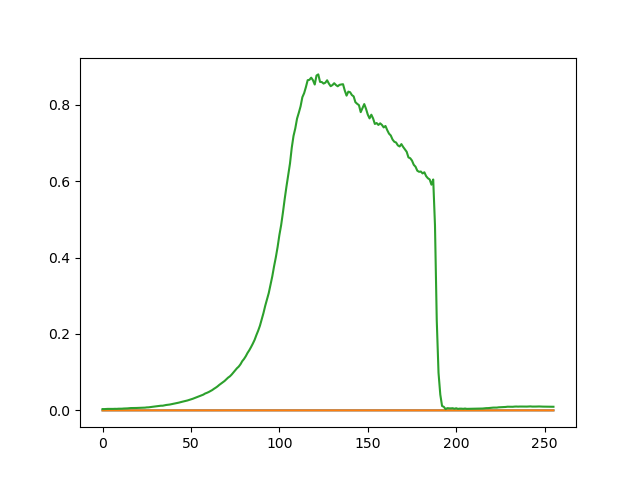

In [43]:
plt.figure()
plt.plot(signals_unmean[0, 768:1024])
plt.plot(signals_unmean[0, 1024+0:1024+256])
plt.plot(signals_unmean[0, 1024+256:1024+512])

In [20]:
randix = np.load("data/data-MSI-hairpin_001-train-idx.npz")['idx']

In [23]:
(data_signals[randix, :])[np.where(np.sum(data_bad_table[randix, :], axis=1) == 0)[0]].shape

(130756, 1715)

In [24]:
np.where(np.mean((data_signals[randix, :])[np.where(np.sum(data_bad_table[randix, :], axis=1) == 0)[0]][:, 1536+40:1664+80] * data_ptp[6] + data_mean[6], axis=1) > 1000)[0]

array([71235, 71236, 71237, ..., 74068, 74069, 74070])

<IPython.core.display.Javascript object>


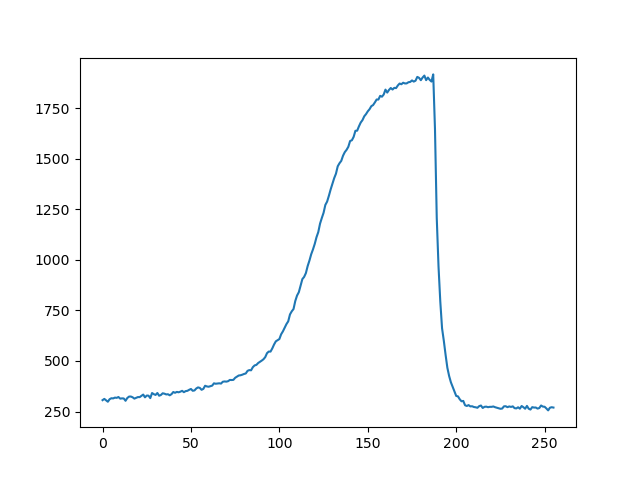

In [31]:
plt.figure()
plt.plot((data_signals[randix, :])[np.where(np.sum(data_bad_table[randix, :], axis=1) == 0)[0]][71235+5, 0:256] * data_ptp[6] + data_mean[6])

In [41]:
np.where(np.mean((data_signals[randix, :])[np.where(np.sum(data_bad_table[randix, :], axis=1) == 0)[0]][:, 200:210]) > 250)

(array([], dtype=int64),)

<IPython.core.display.Javascript object>


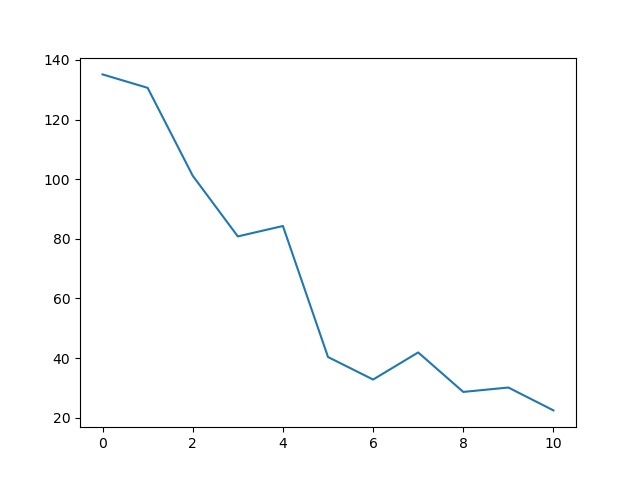

In [37]:
plt.figure()
plt.plot((data_signals[randix, :])[np.where(np.sum(data_bad_table[randix, :], axis=1) == 0)[0]][71235+5, 200:211] * data_ptp[0] + data_mean[0])